In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import accuracy_score ,confusion_matrix,classification_report

In [8]:
data=pd.read_csv('data/knn_Data.txt',index_col=0)

In [9]:
data.head()

WTT       PTI       EQW       SBI       LQE       QWG       FDJ  \
0  0.913917  1.162073  0.567946  0.755464  0.780862  0.352608  0.759697   
1  0.635632  1.003722  0.535342  0.825645  0.924109  0.648450  0.675334   
2  0.721360  1.201493  0.921990  0.855595  1.526629  0.720781  1.626351   
3  1.234204  1.386726  0.653046  0.825624  1.142504  0.875128  1.409708   
4  1.279491  0.949750  0.627280  0.668976  1.232537  0.703727  1.115596   

        PJF       HQE       NXJ  TARGET CLASS  
0  0.643798  0.879422  1.231409             1  
1  1.013546  0.621552  1.492702             0  
2  1.154483  0.957877  1.285597             0  
3  1.380003  1.522692  1.153093             1  
4  0.646691  1.463812  1.419167             1

In [11]:
x_data=data.drop(['TARGET CLASS'],axis=1)

In [12]:
scaler=StandardScaler()

In [15]:
x_scaled=scaler.fit_transform(x_data)
y=data['TARGET CLASS']

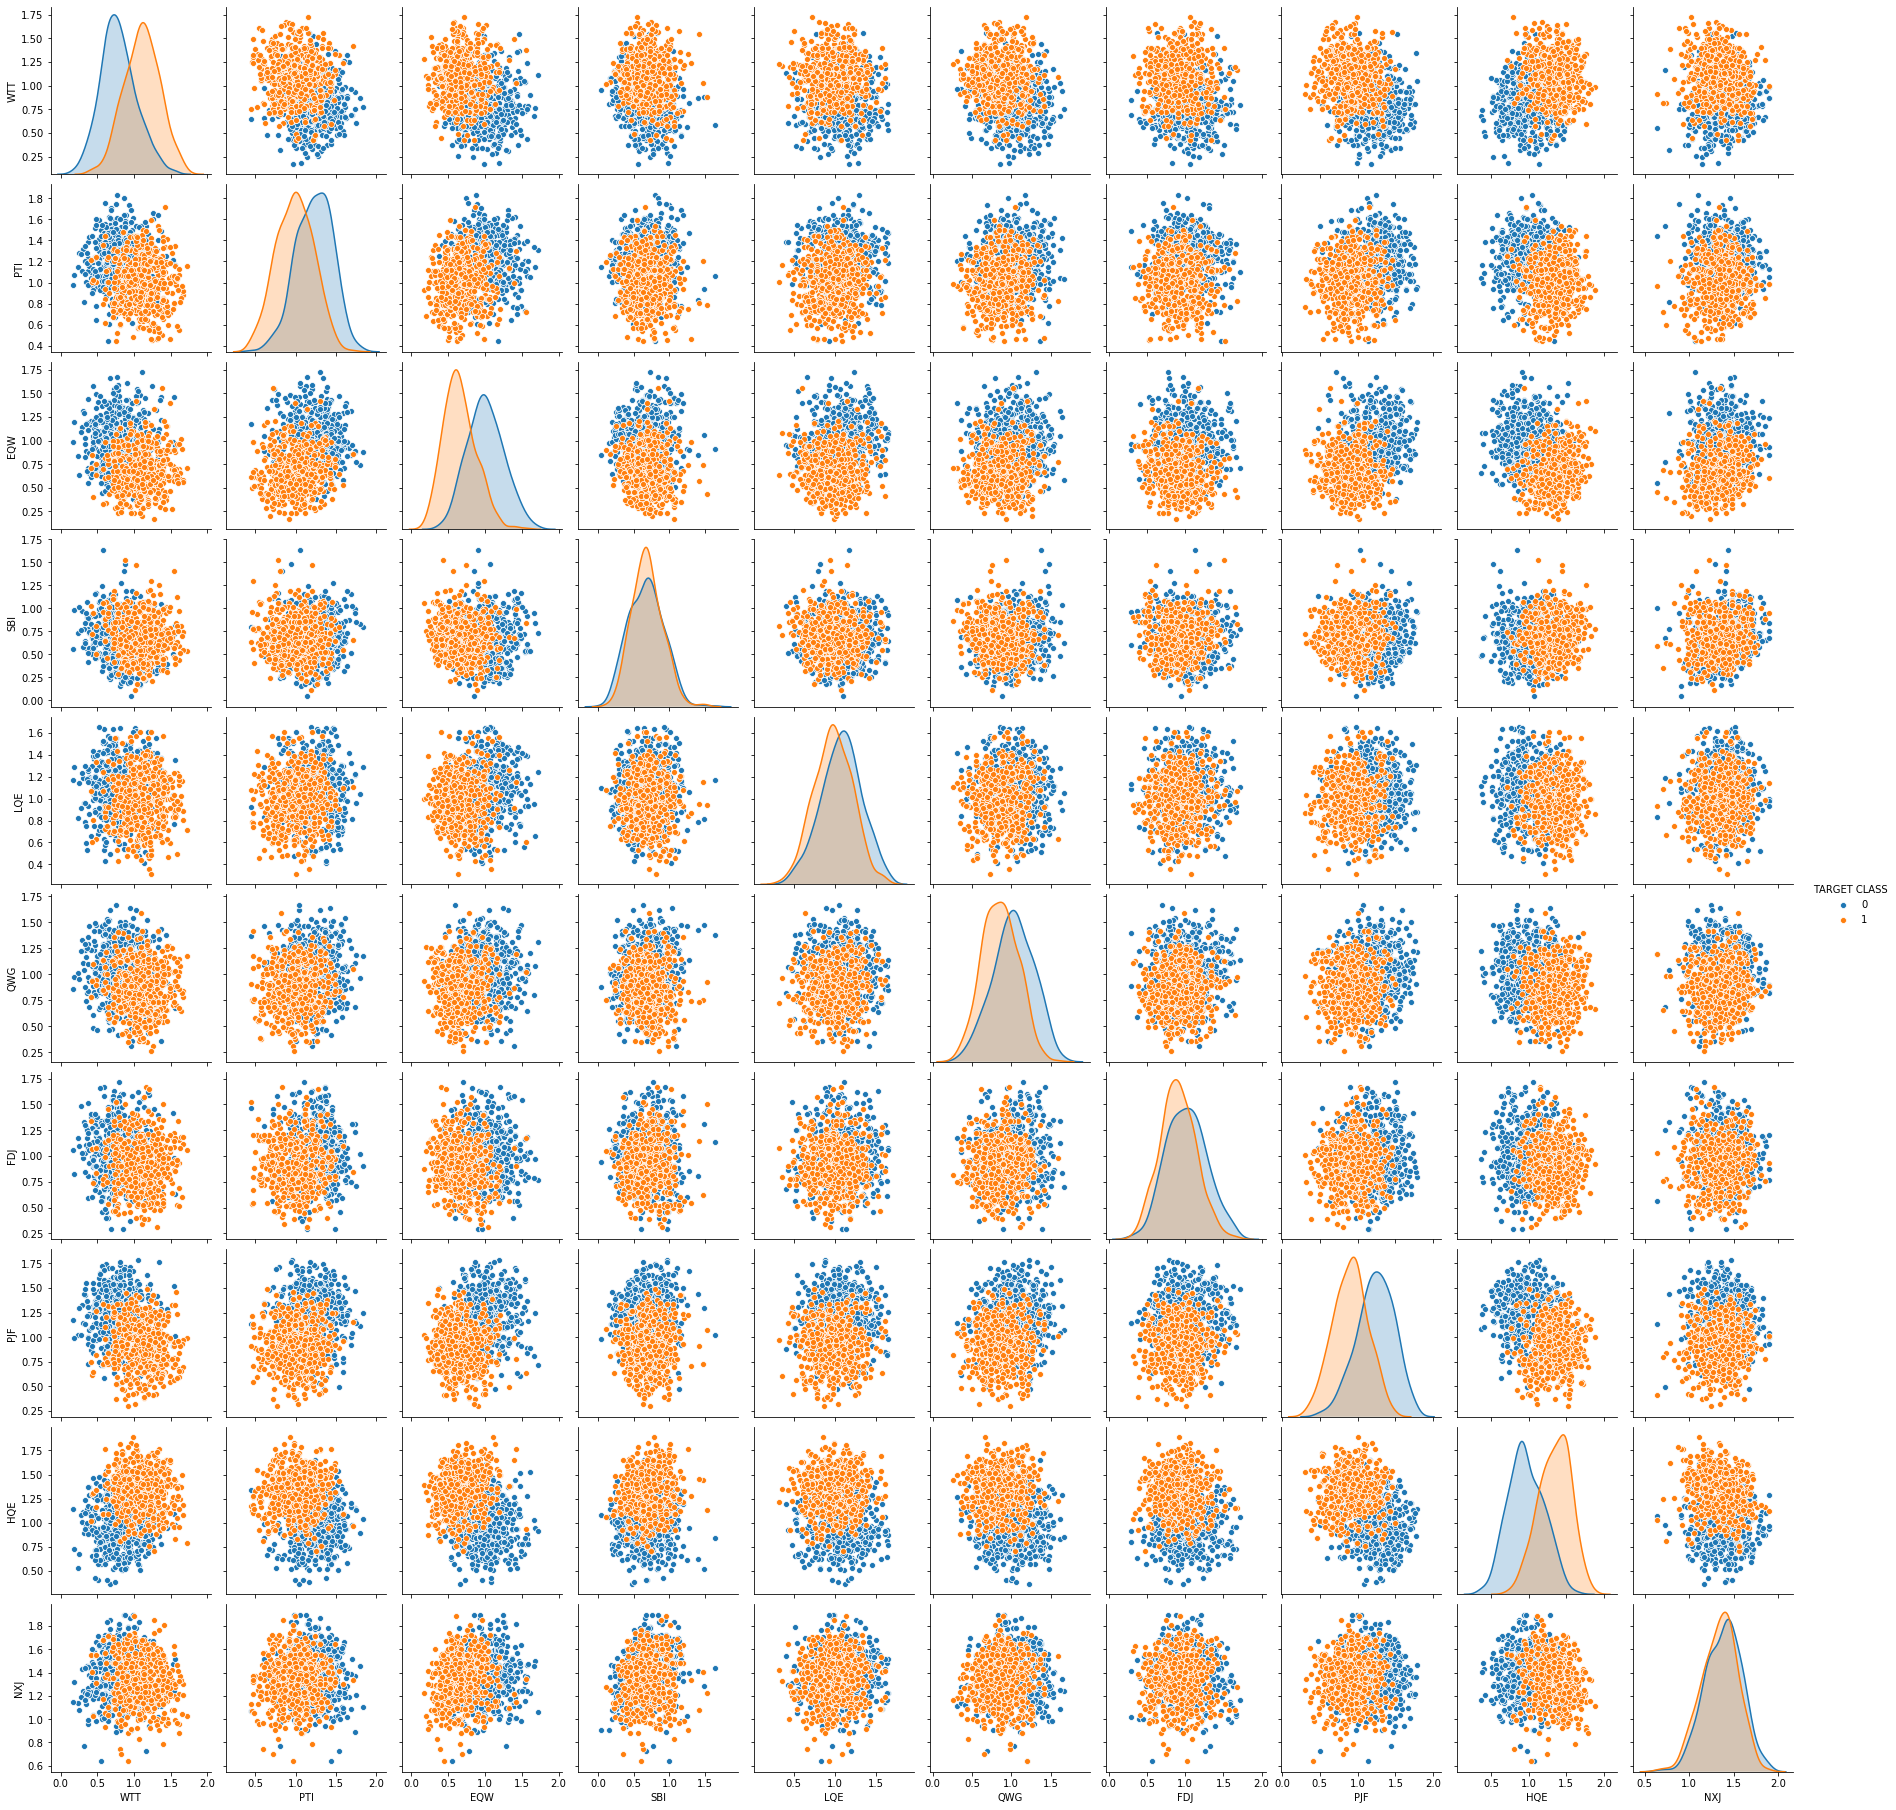

In [18]:
sns.pairplot(data,hue='TARGET CLASS')

In [20]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.3)

In [21]:
knn=KNeighborsClassifier(n_neighbors=1)

In [22]:
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [23]:
pred=knn.predict(x_test)

## Predication And Evaluation

In [26]:
print(confusion_matrix(y_test,pred))

[[129  19]
 [ 14 138]]


In [27]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.90      0.87      0.89       148
           1       0.88      0.91      0.89       152

    accuracy                           0.89       300
   macro avg       0.89      0.89      0.89       300
weighted avg       0.89      0.89      0.89       300



In [29]:
accuracy_rate=[]

for i in range(1,40):
    knn=KNeighborsClassifier(n_neighbors=i)
    score=cross_val_score(knn,x_scaled,y,cv=10)## 10 different experemnet , spleating of the data is done internally
    accuracy_rate.append(score.mean())

In [33]:
error_rate=[]

for i in range(1,40):
    knn=KNeighborsClassifier(n_neighbors=i)
    score=cross_val_score(knn,x_scaled,y,cv=10)## 10 different experemnet , spleating of the data is done internally
    error_rate.append(1-score.mean())
    
    
    
## also can be done using the previo    
# error_rate=[]
# accuracy_score=[]
# for i in range(1,40):
#     knn=KNeighborsClassifier(n_neighbors=i)
#     knn.fit(x_train,y_train)
#     prid_i=knn.predict(x_test)

#     error_rate.append(np.mean(prid_i!=y_test))

In [34]:
error_rate

[0.08900000000000008,
 0.09099999999999997,
 0.07199999999999984,
 0.06600000000000006,
 0.07100000000000006,
 0.07099999999999995,
 0.06899999999999973,
 0.06599999999999984,
 0.07100000000000006,
 0.06499999999999984,
 0.06700000000000017,
 0.06499999999999984,
 0.06299999999999994,
 0.05899999999999994,
 0.06099999999999994,
 0.06099999999999994,
 0.06500000000000006,
 0.06399999999999983,
 0.06399999999999983,
 0.06399999999999983,
 0.06600000000000006,
 0.06400000000000006,
 0.06999999999999995,
 0.06699999999999995,
 0.06500000000000006,
 0.06299999999999994,
 0.061999999999999944,
 0.062000000000000055,
 0.06299999999999994,
 0.06099999999999994,
 0.06399999999999983,
 0.05700000000000005,
 0.06299999999999994,
 0.06099999999999994,
 0.06099999999999994,
 0.05999999999999994,
 0.06300000000000006,
 0.05700000000000005,
 0.05899999999999994]

Text(0.5, 1.0, 'Error Rate')

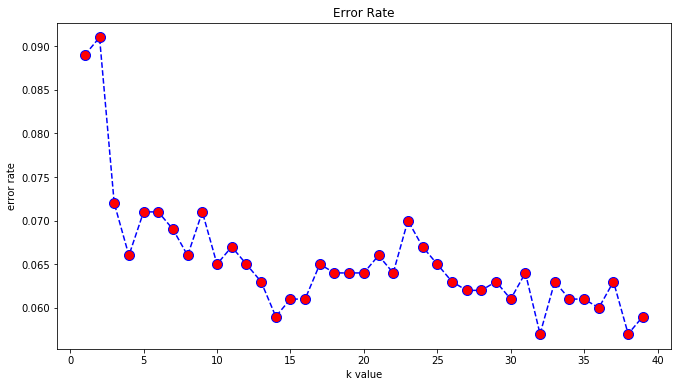

In [37]:
plt.figure(figsize=(11,6))
plt.plot(range(1,40),error_rate,color='blue',linestyle='dashed',marker='o',markerfacecolor='red',markersize=10)
plt.xlabel('k value')
plt.ylabel('error rate')
plt.title('Error Rate')

Text(0.5, 1.0, 'Accurace Rate')

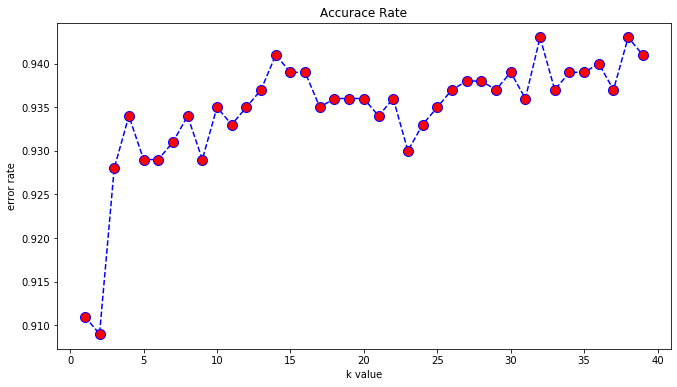

In [38]:
plt.figure(figsize=(11,6))
plt.plot(range(1,40),accuracy_rate,color='blue',linestyle='dashed',marker='o',markerfacecolor='red',markersize=10)
plt.xlabel('k value')
plt.ylabel('error rate')
plt.title('Accurace Rate')

In [52]:
## now using k=20 for the above analysis
knn=KNeighborsClassifier(n_neighbors=23)
knn.fit(x_train,y_train)
predication=knn.predict(x_test)

In [53]:
accuracy_score(y_test,predication)

0.9233333333333333